In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [28]:
train_data=pd.read_csv("dataset/train.csv")
test_data=pd.read_csv('dataset/test.csv')

In [29]:
train_data.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [30]:
test_data.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [31]:
train_data.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [32]:
test_data.isnull().sum()

patient_id                    0
name_of_drug                  0
review_by_patient             0
drug_approved_by_UIC          0
number_of_times_prescribed    0
use_case_for_drug             0
effectiveness_rating          0
dtype: int64

In [33]:
print(train_data.shape)
print(test_data.shape)

(32165, 8)
(10760, 7)


In [34]:
train_data.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [36]:
Y = train_data[["base_score"]]
del train_data["base_score"]
X = train_data[["patient_id","name_of_drug","review_by_patient","drug_approved_by_UIC","number_of_times_prescribed","use_case_for_drug","effectiveness_rating"]]

In [37]:
X.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,206461,Valsartan,"""It has no side effect, I take it in combinati...",20-May-12,27,Left Ventricular Dysfunction,9
1,95260,Guanfacine,"""My son is halfway through his fourth week of ...",27-Apr-10,192,ADHD,8
2,92703,Lybrel,"""I used to take another oral contraceptive, wh...",14-Dec-09,17,Birth Control,5
3,35696,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",27-Nov-16,37,Opiate Dependence,9
4,155963,Cialis,"""2nd day on 5mg started to work with rock hard...",28-Nov-15,43,Benign Prostatic Hyperplasia,2


In [38]:
Y.head()

,base_score
0,8.022969
1,7.858458
2,6.341969
3,6.590176
4,6.144782


In [39]:
X.dtypes

patient_id                     int64
name_of_drug                  object
review_by_patient             object
drug_approved_by_UIC          object
number_of_times_prescribed     int64
use_case_for_drug             object
effectiveness_rating           int64
dtype: object

In [40]:
Label_enc=LabelEncoder()
new_X = X.apply(Label_enc.fit_transform)
new_test = test_data.apply(Label_enc.fit_transform)
new_X.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,28649,2072,21000,1474,27,335,8
1,13333,923,23254,2213,192,39,7
2,13000,1212,15592,606,17,110,4
3,5042,332,25354,2305,37,412,8
4,21683,436,182,2420,43,105,1


In [41]:
new_test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,7573,854,7164,2058,22,130,9
1,1821,311,813,2640,35,441,8
2,9665,1471,81,2274,13,241,3
3,1051,821,7562,998,21,299,6
4,4427,66,909,442,44,231,1


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='effectiveness_rating', ylabel='Density'>

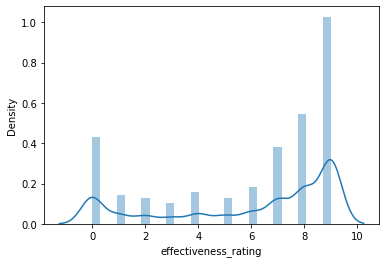

In [42]:
sns.distplot(new_X['effectiveness_rating'])

<AxesSubplot:>

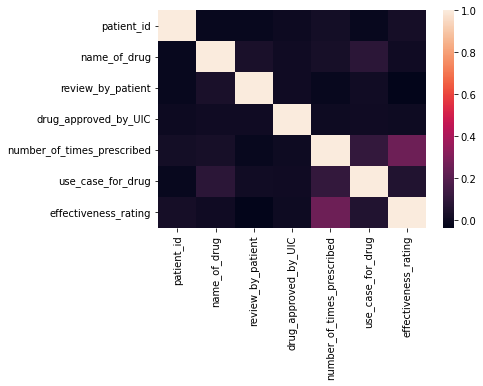

In [43]:
cor=new_X.corr()
sns.heatmap(cor)

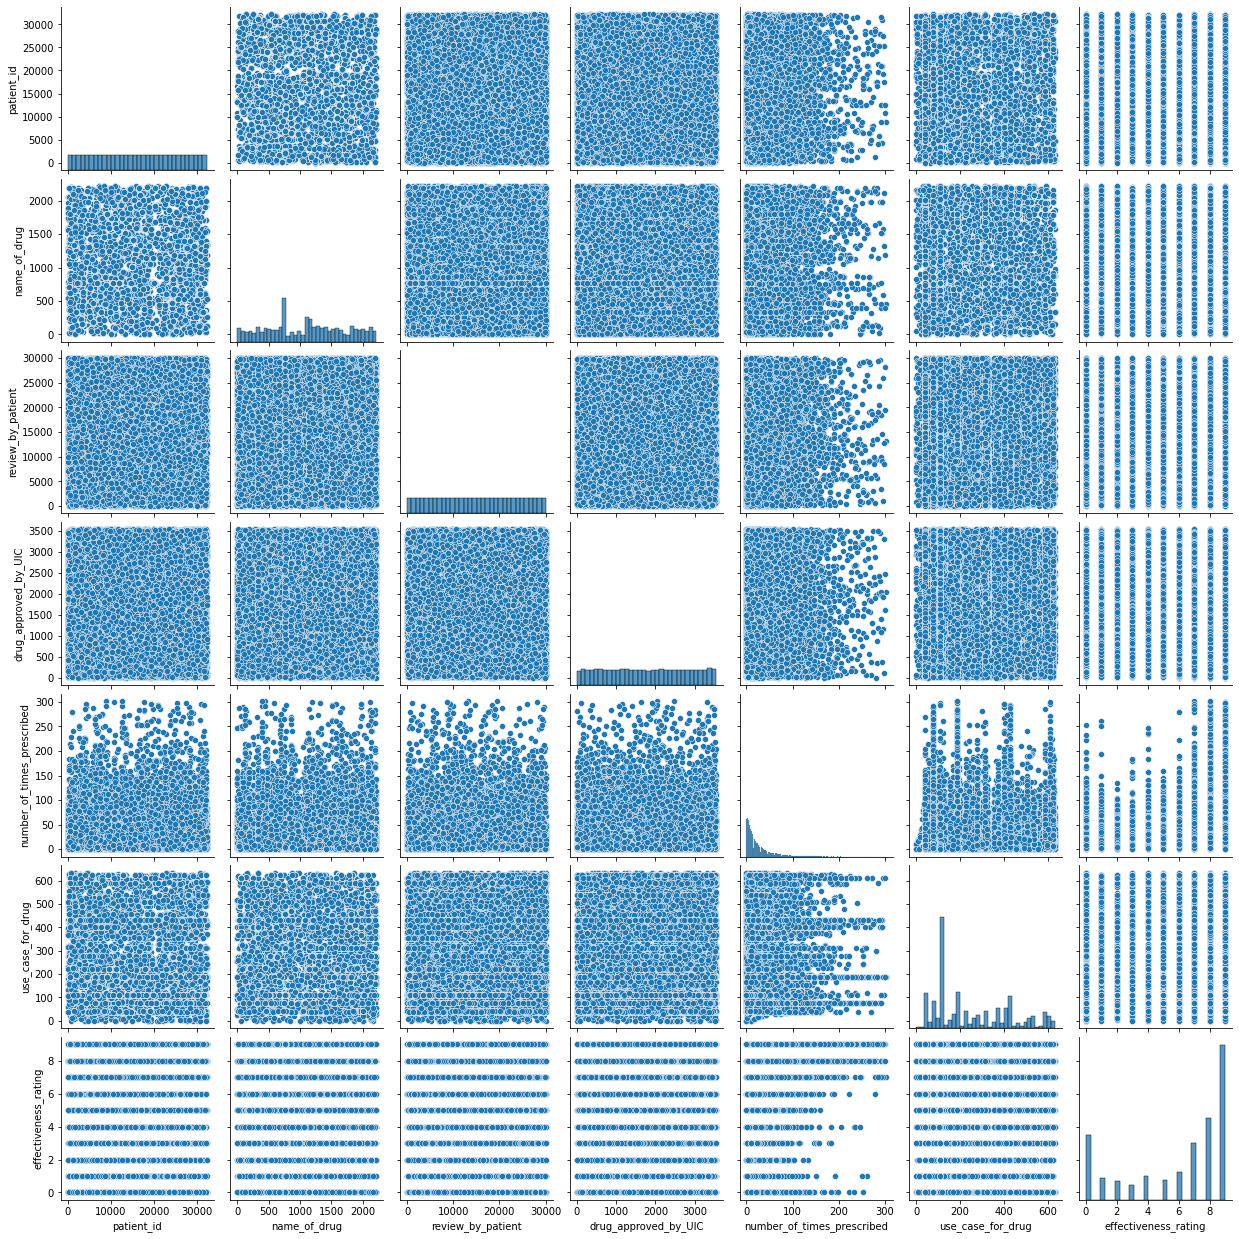

In [44]:
sns.pairplot(new_X)

In [45]:
X_train, X_test, y_train, y_test = split(new_X,Y, test_size=0.01,random_state=51)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31843, 7)
(31843, 1)
(322, 7)
(322, 1)


In [ ]:
param_tuning = {
    'learning_rate': np.arange(0.15, 0.20, 0.01),
    'max_depth': np.arange(5, 15, 5, dtype=int),
    'n_estimators' : np.arange(1000,1800,10, dtype=int),
}

xgb_model = xgb.XGBRegressor()

gsearch = GridSearchCV(estimator = xgb_model,
                        param_grid = param_tuning,
                        cv = 2,                        
                        verbose = 1)

gsearch.fit(X_train,y_train)

print(gsearch.best_params_)

In [47]:
xgb_model = xgb.XGBRegressor(learning_rate=0.17,
                         n_estimators =1400,
                         max_depth =5    
                        )
RFR_model = RandomForestRegressor(max_features='sqrt')

In [48]:
xgb_model.fit(X_train, y_train)
RFR_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
RFR_pred = RFR_model.predict(X_test)

/var/folders/y7/83f11dtd1dg02gpz5rvf489m0000gn/T/ipykernel_3260/3339391623.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR_model.fit(X_train, y_train)


In [49]:
print(np.sqrt(mean_squared_error(y_test,xgb_pred)))
print(np.sqrt(mean_squared_error(y_test,RFR_pred)))

0.11813796350495377
0.7651938449540026


In [50]:
print(r2_score(y_test, xgb_pred))
print(r2_score(y_test, RFR_pred))

0.9943421577848831
0.7626360242777659


In [51]:
pred_test_set = xgb_model.predict(new_test)

In [52]:
pred_test_set.shape

(10760,)

In [53]:
test_data.shape

(10760, 7)

In [54]:
sample_submission = pd.DataFrame()
sample_submission['patient_id'] = test_data['patient_id']
sample_submission['base_score'] = pred_test_set.round(2)
sample_submission.to_csv('sample_submission.csv', index=False)
print("Done!!!")

Done!!!


In [55]:
sample_submission.head()

,patient_id,base_score
0,163740,8.76
1,39293,8.75
2,208087,5.91
3,23295,5.91
4,97013,5.14
